# Sentiment analysis and wordcloud

The code performs sentiment analysis and creates wordcloud of the given data. Data contains 2780000 tweets with hastag #Ukraine. The goal of this research to study overall subjectivity & polarity of tweets, and see most common words with wordcloud.

In [2]:
import tweepy, requests
import pandas as pd
import tweepy, requests, time
import re
from datetime import datetime
import unicodedata

In [60]:
import numpy as np
import random
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import traceback
import logging
from IPython.display import display, clear_output
from PIL import Image

In [91]:
# Function that cleans text 
def cleantxt(text):
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'@[A-Za-z0-9,_,:,;]+', '', text) # Removed @mentions
    text = re.sub(r'#', '', text) # Removing the '#' symbol
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    return text

# Function that cleans text b""
def cleantxt_b1(text):
    text = re.sub(r'b[""]', '', text) # Removing b""
    return text

# Function that cleans text b''
def cleantxt_b2(text):
    text = re.sub(r"b['']", "", text) # Removing b''
    return text

# Function that gets subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function that gets polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function that analyzies polarity and clarifies either the tweet is negative, positive, or neutral
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [6]:
log = pd.read_csv('Login.csv')
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
bearer_token = log['Key'][4]
accessToken = log['Key'][2]
accessTokenSecret = log['Key'][3]

# Creat authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

client = tweepy.Client(bearer_token=bearer_token,
                       wait_on_rate_limit = True)

In [48]:
df1 = pd.read_csv('Ukraine_Tweets/ukraine_lang=en_isretweet_20220201_20220228.csv', )
df2 = pd.read_csv('Ukraine_Tweets/ukraine_lang=en_isretweet_20220301_20220331.csv')
df3 = pd.read_csv('Ukraine_Tweets/ukraine_lang=en_isretweet_20220401_20220430.csv')
df4 = pd.read_csv('Ukraine_Tweets/ukraine_lang=en_isretweet_20220501_20220531.csv')
df5 = pd.read_csv('Ukraine_Tweets/ukraine_lang=en_isretweet_20220601_20220630.csv')
df6 = pd.read_csv('Ukraine_Tweets/ukraine_lang=en_isretweet_20220701_20220731.csv')

df = pd.concat([df1,df2], ignore_index=True)
df = pd.concat([df,df3], ignore_index=True)
df = pd.concat([df,df4], ignore_index=True)
df = pd.concat([df,df5], ignore_index=True)
df = pd.concat([df,df6], ignore_index=True)

df = df.drop(['tweet_id', 'author_id', 'tweet_created_at'], axis=1)

df

,tweet_text
0,"b""@genxer22 @Justin_Ling @cafreeland Her grand..."
1,"b""Rep. Lauren Boebert Says Canada And U.S. 'Ne..."
2,"b""@JennaEllisEsq This is so typical of republi..."
3,"b""I don't remember any war or any political is..."
4,b'@mmflood @Ukraine @elonmusk Ukraine solicit ...
...,...
2779995,b'Ukraine will be annexed by either Russia Or ...
2779996,b'@VABVOX Half the people listening at Turning...
2779997,b'@AXS #LAUGHTILLITHURTS IN AID OF \n@BritishR...
2779998,b'Funds were raised in Poland for Bayraktar fo...


The data has been provided in 6 separate csv files. Therefore I needed to concatenate them into single dataframe.

In [49]:
# Clean tweets
df['tweet_text'] = df['tweet_text'].apply(cleantxt)
df['tweet_text'] = df['tweet_text'].apply(cleantxt_b1)
df['tweet_text'] = df['tweet_text'].apply(cleantxt_b2)

df

,tweet_text
0,"Her grandfather was a Nazi, only normal she..."
1,Rep. Lauren Boebert Says Canada And U.S. 'Need...
2,This is so typical of republicans. When the c...
3,I don't remember any war or any political issu...
4,Ukraine solicit Bitcoin Donation After Russ...
...,...
2779995,Ukraine will be annexed by either Russia Or US...
2779996,Half the people listening at Turning Points s...
2779997,LAUGHTILLITHURTS IN AID OF \n Ukraine Appeal ...
2779998,Funds were raised in Poland for Bayraktar for ...


### Subjectivity & Polarity

In [50]:
df['Subjectivity'] = df['tweet_text'].apply(get_subjectivity)
df['Polarity'] = df['tweet_text'].apply(get_polarity)

df

,tweet_text,Subjectivity,Polarity
0,"Her grandfather was a Nazi, only normal she...",0.633333,0.133333
1,Rep. Lauren Boebert Says Canada And U.S. 'Need...,0.000000,0.000000
2,This is so typical of republicans. When the c...,0.250000,-0.083333
3,I don't remember any war or any political issu...,0.532778,0.030000
4,Ukraine solicit Bitcoin Donation After Russ...,0.000000,0.000000
...,...,...,...
2779995,Ukraine will be annexed by either Russia Or US...,0.900000,0.700000
2779996,Half the people listening at Turning Points s...,0.208333,0.041667
2779997,LAUGHTILLITHURTS IN AID OF \n Ukraine Appeal ...,0.000000,0.000000
2779998,Funds were raised in Poland for Bayraktar for ...,0.750000,0.250000


In [52]:
df['Analysis'] = df['Polarity'].apply(get_analysis)

df

,tweet_text,Subjectivity,Polarity,Analysis
0,"Her grandfather was a Nazi, only normal she...",0.633333,0.133333,Positive
1,Rep. Lauren Boebert Says Canada And U.S. 'Need...,0.000000,0.000000,Neutral
2,This is so typical of republicans. When the c...,0.250000,-0.083333,Negative
3,I don't remember any war or any political issu...,0.532778,0.030000,Positive
4,Ukraine solicit Bitcoin Donation After Russ...,0.000000,0.000000,Neutral
...,...,...,...,...
2779995,Ukraine will be annexed by either Russia Or US...,0.900000,0.700000,Positive
2779996,Half the people listening at Turning Points s...,0.208333,0.041667,Positive
2779997,LAUGHTILLITHURTS IN AID OF \n Ukraine Appeal ...,0.000000,0.000000,Neutral
2779998,Funds were raised in Poland for Bayraktar for ...,0.750000,0.250000,Positive


### Word Cloud

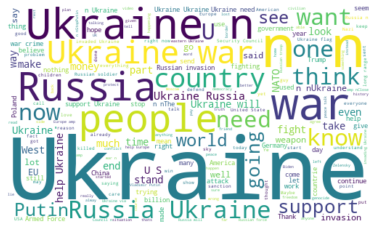

In [51]:
allwords = ' '.join(tweets for tweets in df['tweet_text'])
wc = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119, 
               background_color = 'white').generate(allwords)

plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show() 

### Scatter Plot

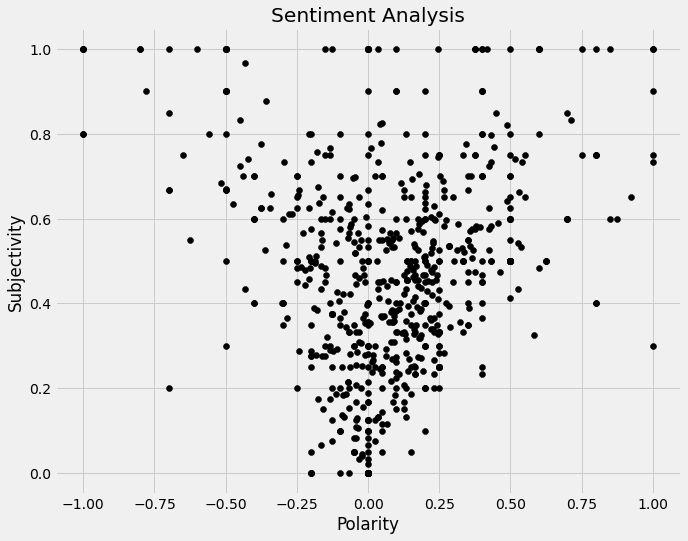

Positive    1129208
Neutral      979253
Negative     671539
Name: Analysis, dtype: int64

In [88]:
# Sample 1000 tweets 
delta = []
for i in df.index.values:
    delta.append(i)
    
delta_sampled = random.sample(delta,1000)

plt.figure(figsize = (10,8))
for i in delta_sampled:
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Black')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

print('')
display(df['Analysis'].value_counts())

### Bar Plot

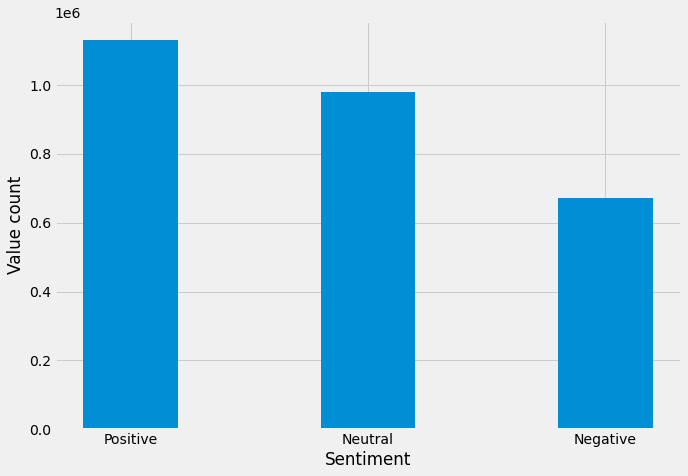

In [90]:
# Barplot
df_plot = df['Analysis'].value_counts().rename_axis('Sentiment').reset_index(name = 'Counts')

y = df_plot['Counts']
x = df_plot['Sentiment']

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(x, y, width = 0.4)
plt.xlabel('Sentiment')
plt.ylabel('Value count')
plt.show()

According to the barplot, most tweets contain positive content towards the topic. And very subjective, according to the scatterplot. 